In [1]:
import shap
import joblib
import pandas as pd
import matplotlib.pyplot as plt

/home/liya/Desktop/KAIM/fraud-detection-for-eCommerce-w8/.venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# Load the best models
rf_credit_model = joblib.load("../models/rf_credit.pkl")
fraud_rf_model = joblib.load("../models/random_forest_model.pkl")

In [3]:
# Load the corresponding test datasets
_, _, X_credit_test, _, _ = joblib.load("../data/creditcard_preprocessed.pkl")
_, _, X_fraud_test, _, _ = joblib.load("../data/preprocessed_data.pkl")

In [4]:
# Subsample test data for faster SHAP computation
credit_sample = X_credit_test.sample(20, random_state=42)
fraud_sample = X_fraud_test.sample(20, random_state=42)

In [5]:
# Initialize SHAP TreeExplainers with optimized settings
explainer_credit = shap.TreeExplainer(rf_credit_model, feature_perturbation="tree_path_dependent")
explainer_fraud = shap.TreeExplainer(fraud_rf_model, feature_perturbation="tree_path_dependent")

In [7]:
# Compute SHAP values (for class 1 - fraud class) with check_additivity=False to avoid error
shap_values_credit = explainer_credit.shap_values(credit_sample, check_additivity=False)
shap_values_fraud = explainer_fraud.shap_values(fraud_sample, check_additivity=False)



 Credit Card Fraud Detection Model - SHAP Summary Plot


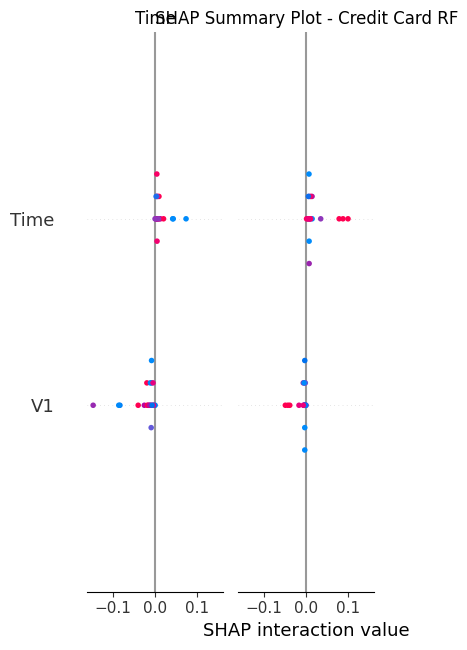

In [9]:
# CREDIT MODEL: Summary Plot
print("\n Credit Card Fraud Detection Model - SHAP Summary Plot")
credit_shap_vals = shap_values_credit[1] if isinstance(shap_values_credit, list) else shap_values_credit
shap.summary_plot(credit_shap_vals, credit_sample, show=False)
plt.title("SHAP Summary Plot - Credit Card RF")
plt.tight_layout()
plt.show()


 General Fraud Detection Model - SHAP Summary Plot


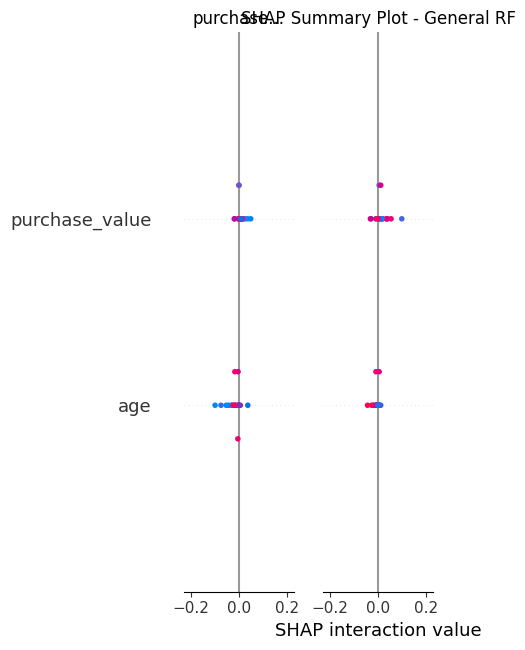

In [10]:
# FRAUD MODEL: Summary Plot
print("\n General Fraud Detection Model - SHAP Summary Plot")
fraud_shap_vals = shap_values_fraud[1] if isinstance(shap_values_fraud, list) else shap_values_fraud
shap.summary_plot(fraud_shap_vals, fraud_sample, show=False)
plt.title("SHAP Summary Plot - General RF")
plt.tight_layout()
plt.show()
